In [1]:
# needed libraries for all problems in the assignment
# (I'm assuming we'll reuse them throughout problems)
import pylab
import numpy as np

# Problem 1

Sayama has great code for generating a phase space diagram in the textbook. It's code 7.1  on p 112 - 113. I used that as the basis for this code.

In [2]:
# from pylab import *
# xvalues, yvalues = meshgrid(arange(0, 3, 0.1), arange(0, 3, 0.1))
# xdot = xvalues - xvalues * yvalues
# ydot = - yvalues + xvalues * yvalues
# streamplot(xvalues, yvalues, xdot, ydot)
# show()

We need to have values set for our parameters in order to generate a graph. They're pretty arbitrary, but we need the values to fit the equilibrium point scenario we're working with.

In [3]:
k1 = 3.0  # arbitrary
k2 = 3.0  # arbitrary
alpha1 = 1.5  # arbitrary, but respects that k2/alpha1 < k1
alpha2 = 1.5  # arbitrary, but respects that k1/alpha2 < k2
a12 = .005  # arbitrary
a21 = .005  # arbitrary
r1 = a12 * k1 / alpha2
r2 = a21 * k2 / alpha1

Now set up the code for the arrows showing the directions the populations move. First we generate a grid of (x,y) values to populate with lines & arrows. Then we define our derivatives (n1dot and n2dot), based on the equations developed in the week 5 video on Lotka-Volterra competition. 

In [4]:
# Equations for streamplot arrows
# This is imitating what Sayama did in his code, which is commented out at the top of this Question's work
n1values, n2values = pylab.meshgrid(np.arange(0, 3.2, 0.1), np.arange(0, 3.2, 0.1))

n1dot = r1 * n1values * (k1 - n1values - alpha2 * n2values) / k1  # equation from Lotka-Volterra week 5 vid
n2dot = r2 * n2values * (k2 - n2values - alpha1 * n1values) / k2  # equation from Lotka-Volterra week 5 vid

Next, I'm setting up the data points for the nullclines. The equations came from what we developed in the week 5 Lotka-Volterra video. Otherwise we're just generating evenly spaced points. 

In [5]:
# Equations for nullclines
constant_increments = np.arange(0, k1, 0.1)
nullcline_n1 = k1 - alpha2 * constant_increments
nullcline_n2 = k2 - alpha1 * constant_increments

Again, the equations for the fixed points come from that same video.

In [6]:
# Equations for fixed equilibrium pointse
n2_point = (0, k2)
n1_point = (k1, 0)
meet_point = ((k1 - alpha2 * k2) / (1 - alpha2 * alpha1), (k2 - alpha1 * k1) / (1 - alpha1 * alpha2))
equilibrium_points = list(zip(n2_point, n1_point, meet_point))  # in Python3, zip is a lazy iterable

Now we are finally plotting. 

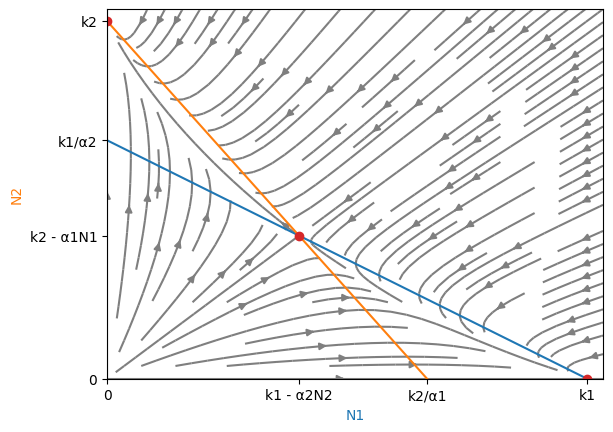

In [7]:
fig, ax = pylab.subplots()

# Set axis limits
pylab.xlim(0, 3.1)
pylab.ylim(0, 3.1)

# Label the axes important points
pylab.xlabel('N1', color='tab:blue')
ax.set_xticks((0, meet_point[0], k2/alpha1, k1), ('0', 'k1 - α2N2', 'k2/α1', 'k1'))

pylab.ylabel('N2', color='tab:orange')
ax.set_yticks((0, meet_point[1], k1/alpha2, k2), ('0', 'k2 - α1N1', 'k1/α2', 'k2'))



# Plot the direction arrows
pylab.streamplot(n1values, n2values, n1dot, n2dot, color='tab:gray')

# Plot nullclines
pylab.plot(nullcline_n1, constant_increments, color='tab:blue')
pylab.plot(constant_increments, nullcline_n2, color='tab:orange')

# Plot equilibrium points
pylab.plot(equilibrium_points[0], equilibrium_points[1], 'o', color='tab:red')

# Label equilibrium points
# pylab.text(0.2, k2 - 0.1, '(K2, 0)', color='r', backgroundcolor='white')
# pylab.text(k1 - 0.1, 0.2, '(0, K1)', color='r', backgroundcolor='white')
 

pylab.show()

# Problem 2

Copy / paste above code to get diagram for Q2:

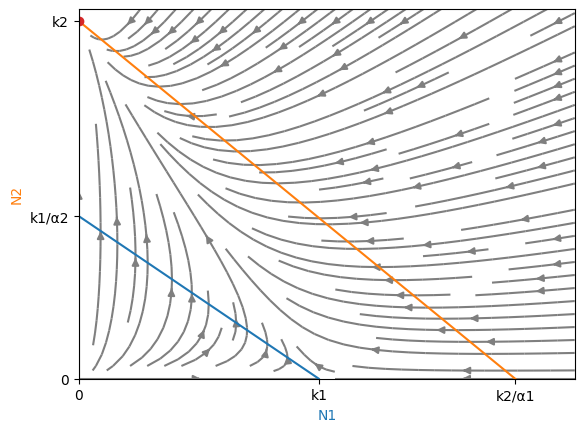

In [8]:
k1 = 1.5  # arbitrary
k2 = 3.0  # arbitrary
alpha1 = 1.1  # arbitrary, but respects that k1 < k2/alpha1
alpha2 = 1.1  # arbitrary, but respects that k1/alpha2 < k2
a12 = .005  # arbitrary
a21 = .005  # arbitrary
r1 = a12 * k1 / alpha2
r2 = a21 * k2 / alpha1

# Equations for streamplot arrows
# This is imitating what Sayama did in his code, which is commented out at the top of this Question's work
n1values, n2values = pylab.meshgrid(np.arange(0, 3.2, 0.1), np.arange(0, 3.2, 0.1))

n1dot = r1 * n1values * (k1 - n1values - alpha2 * n2values) / k1  # equation from Lotka-Volterra week 5 vid
n2dot = r2 * n2values * (k2 - n2values - alpha1 * n1values) / k2  # equation from Lotka-Volterra week 5 vid

# Equations for nullclines
constant_increments = np.arange(0, k2, 0.1)
nullcline_n1 = k1 - alpha2 * constant_increments
nullcline_n2 = k2 - alpha1 * constant_increments

# Equations for fixed equilibrium pointse
n2_point = (0, k2)
# no n1 point
# no intersection point
# equilibrium_points = list(zip(n2_point, n1_point))  # in Python3, zip is a lazy iterable

fig, ax = pylab.subplots()

# Set axis limits
pylab.xlim(0, 3.1)
pylab.ylim(0, 3.1)

# Label the axes important points
pylab.xlabel('N1', color='tab:blue')
ax.set_xticks((0, k2/alpha1, k1), ('0', 'k2/α1', 'k1'))

pylab.ylabel('N2', color='tab:orange')
ax.set_yticks((0, k1/alpha2, k2), ('0', 'k1/α2', 'k2'))


# Plot the direction arrows
pylab.streamplot(n1values, n2values, n1dot, n2dot, color='tab:gray')

# Plot nullclines
pylab.plot(nullcline_n1, constant_increments, color='tab:blue')
pylab.plot(constant_increments, nullcline_n2, color='tab:orange')

# Plot equilibrium points
pylab.plot(n2_point[0], n2_point[1], 'o', color='tab:red')

# Label equilibrium points
# pylab.text(0.2, k2 - 0.1, '(K2, 0)', color='r', backgroundcolor='white')
# pylab.text(k1 - 0.1, 0.2, '(0, K1)', color='r', backgroundcolor='white')
 

pylab.show()

# Problem 3

> Write your own implementations of Euler’s method and Heun’s method (aka 2nd order
Runge-Kutta, aka improved Euler’s method) in the language of your choice. Each
function should have a tunable parameter h which represents the step size. What is
the relationship between Euler’s method and a discrete time model? Chapter 6.4 in
the textbook contains a helpful discussion.

In [9]:
def x_euler(x: float, x_dot: float, h: float) -> float:
    """Take current position x, time derivative function xdot, and timestep h
    and return the next position for x using Euler's method"""
    return x + x_dot * h

def x_heun(x: float, x_dot: float, x_dot_next_euler: float, h: float) -> float:
    """Take the current position x, time derivative function xdot, 
    time derivative at the next Euler position, and timestep h.
    Then return the next position for x using Heun's method"""
    return x + (x_dot + x_dot_next_euler) / 2 * h

# Problem 4

> Numerically solve the continuous SIS model from class using both of your integrators
and parameters N = 100, γ = 0.25, and each β ∈ {0.03, 0.06, 0.1}. Create 9 different
plots showing time series from both your Euler’s and Heun’s method with each of
these parameter combinations, as well as using step sizes h ∈ {0.01, 0.5, 2.0}. Include
legends to distinguish the pairs of β and step sizes, and make sure it is clear which line
1
corresponds to which method. Run the model for 50 steps each time, and use initial
values of (S, I) = (90, 10)

In [10]:
import pandas as pd

### Initialize

In [11]:
# Params given in problem
GAMMA = 0.25

beta_list = [0.03, 0.06, 0.1]
h_list = [0.01, 0.5, 2.0]
N = 100
num_timesteps = 50
S0 = 90
I0 = 10

# Dataframe to save data
columns = ['beta', 'h', 'method', 'population', 't', 'x']
simulation_df = pd.DataFrame(columns=columns)

### Observe

Following equations are from Week 4 "Example of a continuous model" video. 

In [12]:
def dSdt(S: float, I: float, beta: float) -> float:
    # return GAMMA * I - beta * S * I
    return GAMMA * I - beta * (N - I) * I

def dIdt(S: float, I: float, beta: float) -> float:
    # return beta * S * I - GAMMA * I
    return beta * (N - I) * I - GAMMA * I

### Update

In [14]:
if not simulation_df.empty:
    simulation_df = pd.DataFrame(columns=columns)
    # if we have data in this DF from running the cell already,
    # delete it so we don't get weird results

for current_method in ('euler', 'heun'):  # iterate through the two methods so we can compare
    print(f"METHOD = {current_method}")
    print(f"=========================")
    for current_h in h_list:  # iterate through each of the h options
        print(f"\tH = {current_h}")
        print(f"\t===============")
        for current_beta in beta_list:  # iterate through each of the beta options, so we have data for each h/beta pair
            print(f"\t\tbeta = {current_beta}")
            print(f"\t\t============")

            # save the data from the simulation for the current {beta, h, method} combo to a list
            curr_simulation = []
            curr_simulation.append((current_beta, current_h, current_method, 'susceptible', 0, S0))
            curr_simulation.append((current_beta, current_h, current_method, 'infected', 0, I0))
            
            # set initial conditions
            S = S0
            I = I0

            print(f"\t\t\t STARTING SIMULATION")
            print(f"\t\t\t ===================")
            # start the simulation
            for t in np.arange(1, num_timesteps/current_h):  # LHD does this scaling in his class example, not clear from problem wording
                # calculate Euler value for both S and I
                euler_S = x_euler(S,
                                  dSdt(S, I, current_beta),
                                  current_h)
                euler_I = x_euler(I,
                                  dIdt(S, I, current_beta),
                                  current_h)
                
                if current_method == 'euler':
                    # if we're using Euler method, there's no need to do anything else
                    # just update S and I according to our new value
                    S = euler_S
                    I = euler_I
                
                else:
                    # if we're using Heun / improved Euler, use current S and I, and
                    # calculated Euler S and I, to get next result with Heun's method
                    heun_S = x_heun(S,
                                    dSdt(S, I, current_beta),
                                    dSdt(euler_S, euler_I, current_beta),
                                    current_h)
                    heun_I = x_heun(I,
                                    dIdt(S, I, current_beta),
                                    dIdt(euler_S, euler_I, current_beta),
                                    current_h)
                    # Now update S and I to be the Heun result
                    S = heun_S
                    I = heun_I
                
                this_N = S + I
                if t%10 == 0:
                    print(f"\t\t\t Timestep {t}: \tS = {S:.2f}, \tI = {I:.2f}, \tS + I = {this_N:.2f}")

                # Add the calculation results from this timestep to our simulation history data
                curr_simulation.append((current_beta, current_h, current_method, 'susceptible', t, S))
                curr_simulation.append((current_beta, current_h, current_method, 'infected', t, I))

            # Once we're done with all timesteps, convert this run's simulation data 
            # to a dataframe
            curr_df = pd.DataFrame(curr_simulation, columns=columns)

            # Add that dataframe to our overall run
            simulation_df = pd.concat((simulation_df, curr_df))
                    

METHOD = euler
	H = 0.01
		beta = 0.03
			 STARTING SIMULATION
			 Timestep 10.0: 	S = 87.30, 	I = 12.70, 	S + I = 100.00
			 Timestep 20.0: 	S = 84.02, 	I = 15.98, 	S + I = 100.00
			 Timestep 30.0: 	S = 80.10, 	I = 19.90, 	S + I = 100.00
			 Timestep 40.0: 	S = 75.52, 	I = 24.48, 	S + I = 100.00
			 Timestep 50.0: 	S = 70.32, 	I = 29.68, 	S + I = 100.00
			 Timestep 60.0: 	S = 64.58, 	I = 35.42, 	S + I = 100.00
			 Timestep 70.0: 	S = 58.46, 	I = 41.54, 	S + I = 100.00
			 Timestep 80.0: 	S = 52.18, 	I = 47.82, 	S + I = 100.00
			 Timestep 90.0: 	S = 45.95, 	I = 54.05, 	S + I = 100.00
			 Timestep 100.0: 	S = 40.02, 	I = 59.98, 	S + I = 100.00
			 Timestep 110.0: 	S = 34.55, 	I = 65.45, 	S + I = 100.00
			 Timestep 120.0: 	S = 29.69, 	I = 70.31, 	S + I = 100.00
			 Timestep 130.0: 	S = 25.49, 	I = 74.51, 	S + I = 100.00
			 Timestep 140.0: 	S = 21.95, 	I = 78.05, 	S + I = 100.00
			 Timestep 150.0: 	S = 19.03, 	I = 80.97, 	S + I = 100.00
			 Timestep 160.0: 	S = 16.67, 	I = 83.33, 	S

/var/folders/wp/lq_w646n77jc1slxh2r_13f00000gn/T/ipykernel_44997/3349208991.py:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  simulation_df = pd.concat((simulation_df, curr_df))


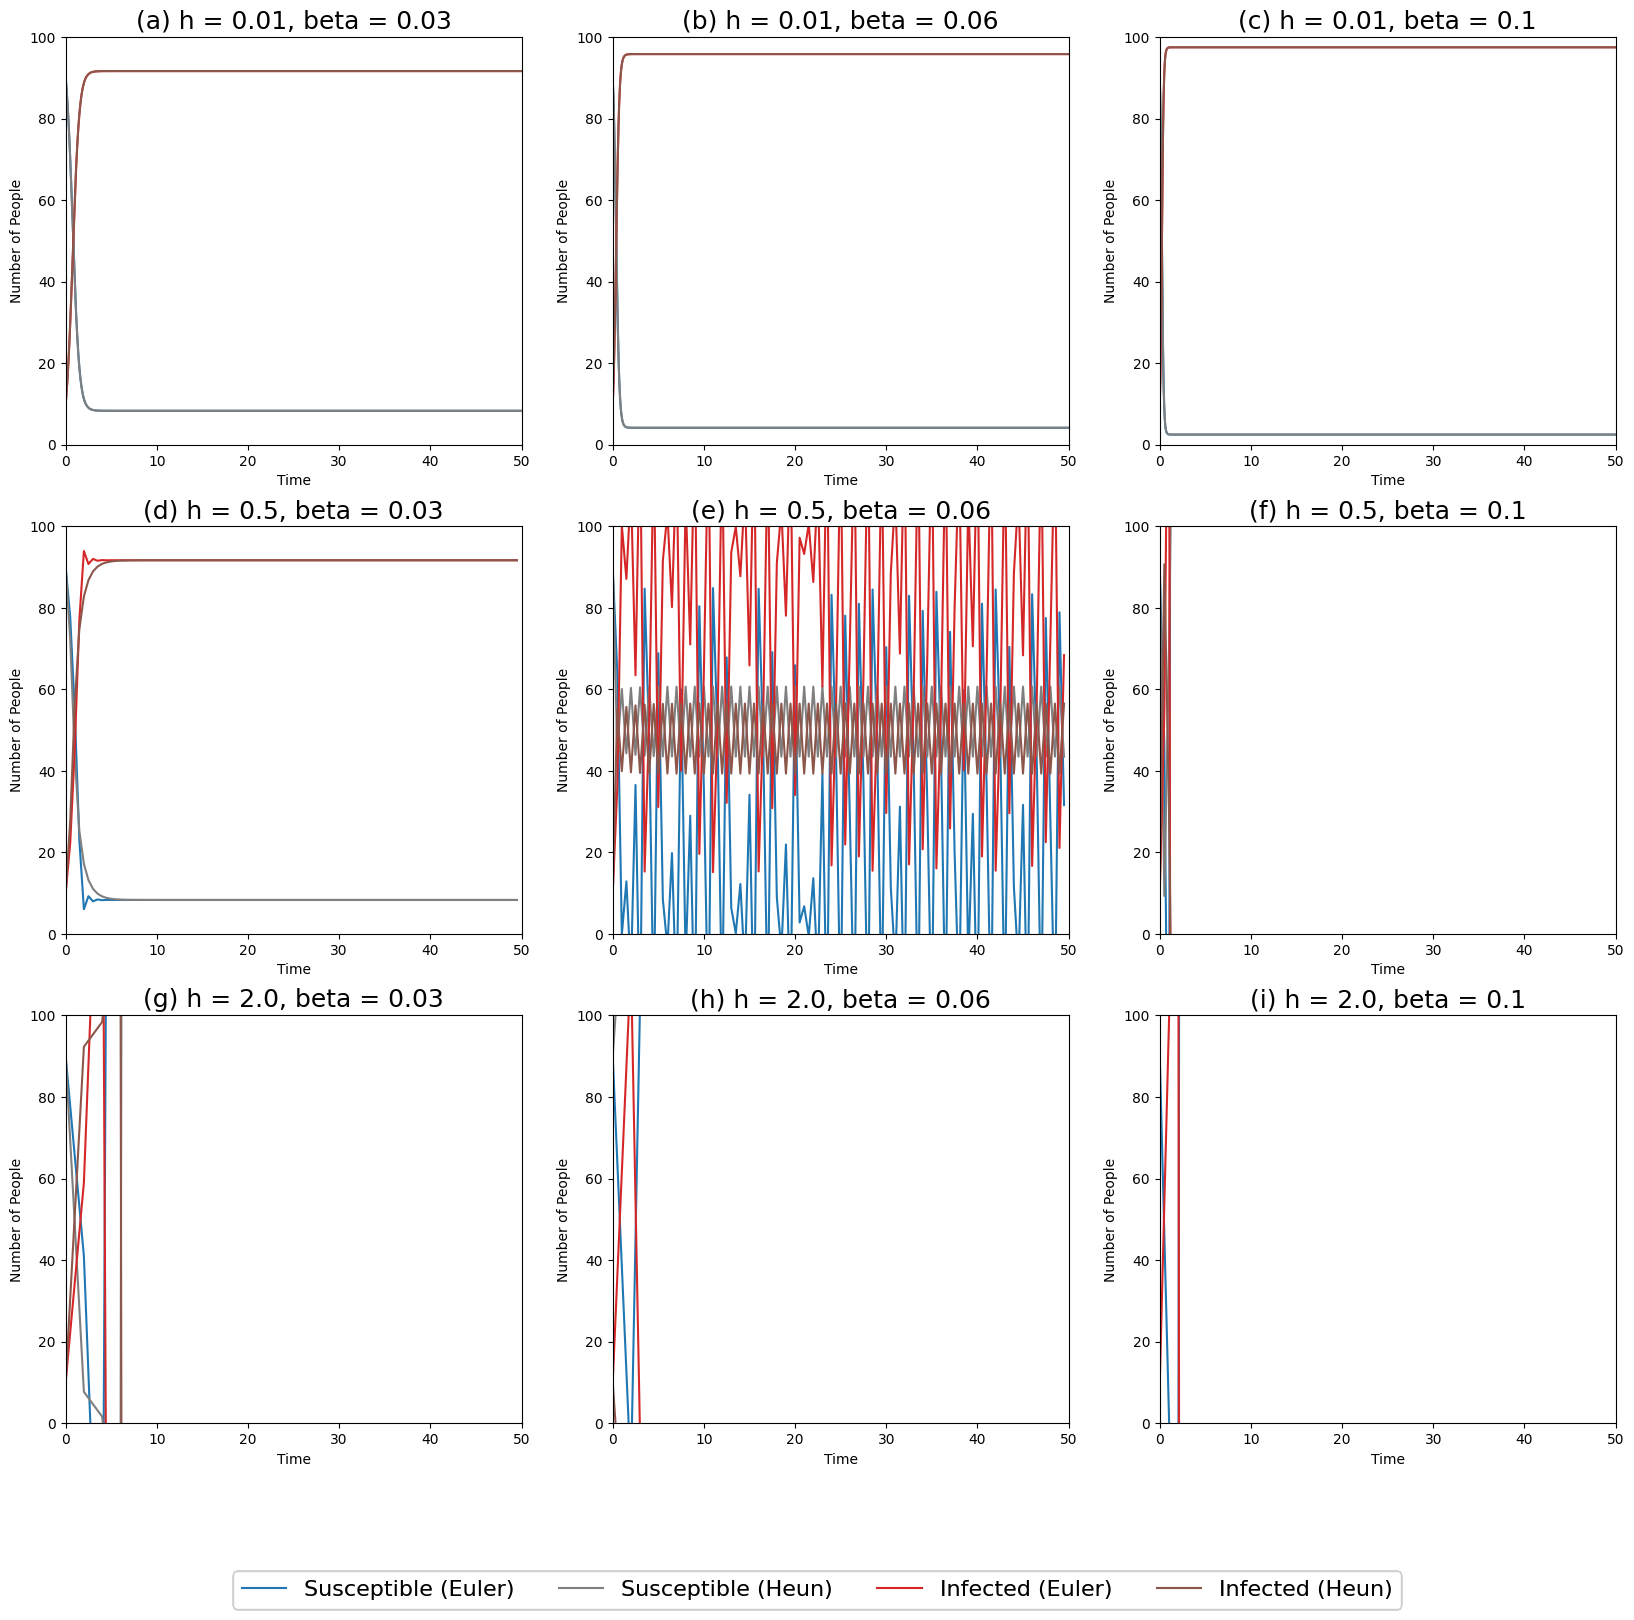

In [39]:
def get_x_y(curr_data, pop, method, h):
    x = curr_data[(curr_data['population']==pop) & (curr_data['method']==method)]['t'] * h
    y = curr_data[(curr_data['population']==pop) & (curr_data['method']==method)]['x']
    return (x, y)

# This matrix is for titling the 9 plots with letter so we can refer to that in the captions
subfig_letters = \
[
    ['a', 'b', 'c'],
    ['d', 'e', 'f'],
    ['g', 'h', 'i']
]


def plot(i, j, beta, h, y_lim=None):
    # Get data for this subplot
    curr_data = simulation_df[(simulation_df['beta']==beta) & (simulation_df['h']==h)]

    # Plot susceptible individuals
    x, y = get_x_y(curr_data, 'susceptible', 'euler', h)
    sus_eul, = ax[j, i].plot(x, y, color='tab:blue')

    x, y = get_x_y(curr_data, 'susceptible', 'heun', h)
    sus_heun, = ax[j, i].plot(x, y, color='tab:gray')

    # Plot infectious individuals
    x, y = get_x_y(curr_data, 'infected', 'euler', h)
    inf_eul, = ax[j, i].plot(x, y, color='tab:red')

    x, y = get_x_y(curr_data, 'infected', 'heun', h)
    inf_heun, = ax[j, i].plot(x, y, color='tab:brown')

    
    # Create the subplot
    ax[j, i].set_xlabel('Time')
    ax[j, i].set_ylabel('Number of People')
    letter = subfig_letters[j][i]
    ax[j,i].set_title(f"({letter}) h = {h}, beta = {beta}", fontdict={'fontsize': 18})
    ax[j, i].set_xlim([0, num_timesteps])
    if y_lim:
        ax[j, i].set_ylim([0, y_lim])
    return [sus_eul, sus_heun, inf_eul, inf_heun]
    

fig, ax = pylab.subplots(len(beta_list), len(h_list), figsize=(20,18))

for i, beta in enumerate(beta_list):
    for j, h in enumerate(h_list):
        lines = plot(i, j, beta, h, y_lim=100)
        labels = ['Susceptible (Euler)', 'Susceptible (Heun)', 'Infected (Euler)', 'Infected (Heun)']
        pylab.figlegend(lines, labels, loc = 'lower center', ncol=5, labelspacing=0., prop={'size': 16})

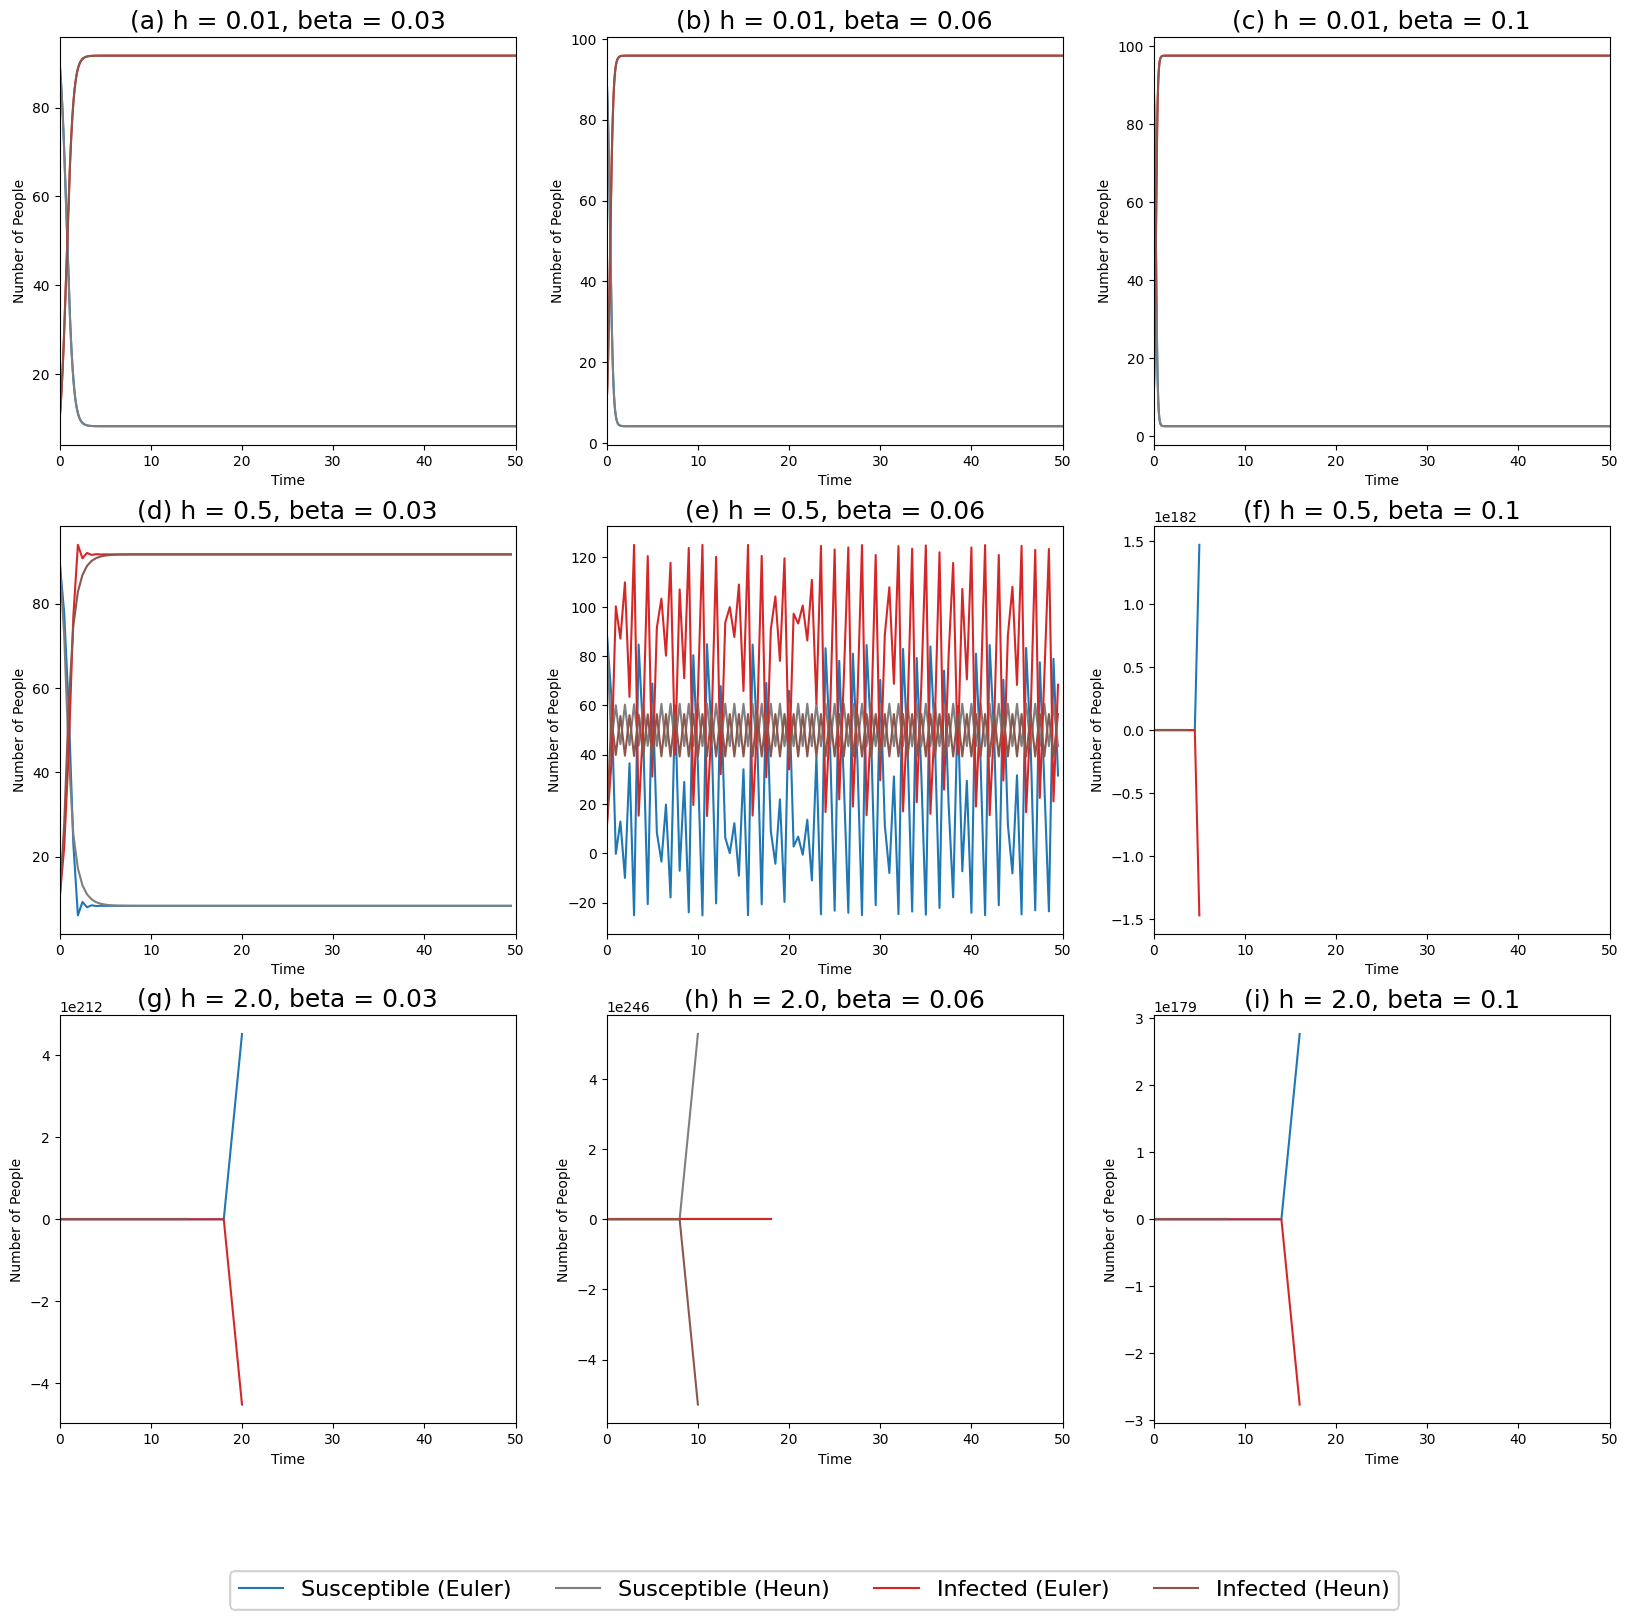

In [42]:
fig, ax = pylab.subplots(len(beta_list), len(h_list), figsize=(20,18))

for i, beta in enumerate(beta_list):
    for j, h in enumerate(h_list):
        lines = plot(i, j, beta, h)  # run without y-lim
        labels = ['Susceptible (Euler)', 'Susceptible (Heun)', 'Infected (Euler)', 'Infected (Heun)']
        pylab.figlegend(lines, labels, loc = 'lower center', ncol=5, labelspacing=0., prop={'size': 16})